In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Writing code for Lotka-Volterra predator prey model.
There are two methods, though Method B is more efficient.

Method A (loopin): 
1. set up arrays for variables
2. loop through each time step
3. use model equation to determine rate of change for each time step
4. step forward to next time step
5. plot

Method B (function):
1. define model equations by setting up a function
2. solve using Python ordinary differential equation (ODE) solver 

Method A:

Define Parameters:

In [0]:
mu = 1  #spec. growth rate for phyto [1/d]
d = 0.1    #ingestion parameter [1/day]
g = 0.75    #mortality parameter [1/day]
alpha = 0.1 #assimilated fraction of ingestion by zoo

#all parameters came from Miller's BioOce textbook

Define Initial and Time Conditions:

when there's a dependence on the time step there is a little bit of error associated

In [0]:
t0 = 0 #[days]
tend = 100
tstep = 0.01

t = np.arange(t0,tend,tstep)
nsteps = len(t)

Po = 75 #inital phyto population [concentration]
Zo = 20 #inital zoo population

P = np.zeros(nsteps)
P[0] = Po
Z = np.zeros(nsteps)
Z[0] = Zo

Define Model Equations and Solve Them:


In [0]:
for i in range(0,nsteps-1):
  dPdt = mu*P[i] - d*P[i]*Z[i]
  dZdt = alpha*d*P[i]*Z[i] - g*Z[i]
  P[i+1] = P[i]+dPdt*tstep
  Z[i+1] = Z[i]+dZdt*tstep
  

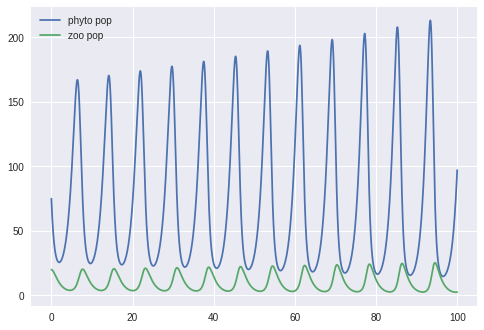

In [139]:
plt.figure()
plt.plot(t,P,label='phyto pop')
plt.plot(t,Z,label='zoo pop')
plt.legend();


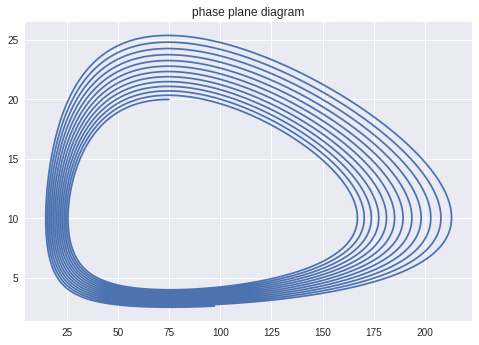

In [140]:
plt.figure()
plt.plot(P,Z)
plt.title('phase plane diagram');

There are some issues with approximating these equations using timesteps....soooo try

Method B:

In [0]:
def lotka_volterra(state, time, mu, d, alpha, g): #time is initial time
  P,Z = state #inital populations
  dPdt = mu*P - d*P*Z
  dZdt = alpha*d*P*Z - g*Z
  return dPdt, dZdt


#we will use Python's ODE to solve this so the order is critical

In [142]:
lotka_volterra([Po,Zo], t0, mu, d, alpha, g)

(-75.0, 1.7763568394002505e-15)

In [143]:
#use odeint function 

solution = odeint(lotka_volterra, [Po,Zo], t, args=(mu, d, alpha, g)) #arg inputs must be in the same order as function you're passing

#t array tells at what times you want the solution

print(solution)

[[75.         20.        ]
 [74.25375637 19.99925266]
 [73.51504687 19.9970204 ]
 ...
 [79.26098709 19.97666724]
 [78.47384466 19.98439333]
 [77.69397991 19.99055608]]


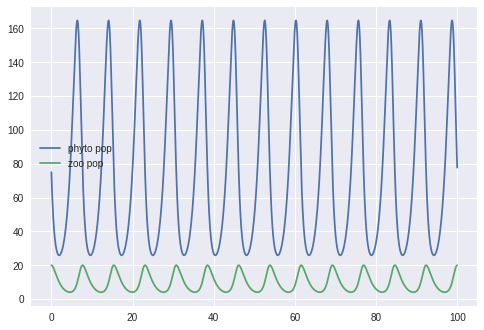

In [144]:
P_odeint = solution[:,0]
Z_odeint = solution[:,1]

plt.figure()
plt.plot(t,P_odeint,label='phyto pop')
plt.plot(t,Z_odeint, label='zoo pop')
plt.legend();

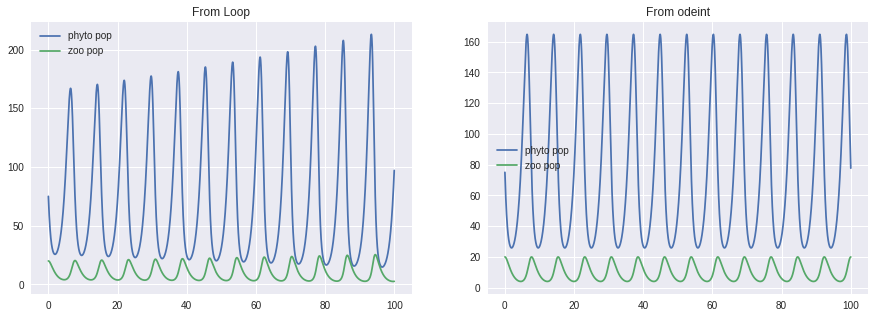

In [145]:
#compare Method A and Method B

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(t,P,label='phyto pop')
plt.plot(t,Z,label='zoo pop')
plt.title('From Loop')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t,P_odeint,label='phyto pop')
plt.plot(t,Z_odeint, label='zoo pop')
plt.title('From odeint')
plt.legend();



Odeint uses methods that are much more efficient than looping through at discrete time steps - but decides the optimal timestep for the most accurate result